# Red Wine Quality Analysis

In [37]:
library(rethinking)
library(plyr)
library(RColorBrewer)

## Data Exploration

In [3]:
d <- read.csv('./winequality-red.csv')

In [9]:
precis(d)

mean        sd           5.5%     94.5%     histogram     
fixed.acidity         8.31963727  1.741096318  6.20000  11.60000 ▁▁▃▇▅▂▂▁▁▁▁▁  
volatile.acidity      0.52782051  0.179059704  0.28000   0.83055 ▁▅▇▅▁▁▁▁      
citric.acid           0.27097561  0.194801137  0.00000   0.59000 ▇▃▅▃▃▂▁▁▁▁    
residual.sugar        2.53880550  1.409928060  1.60000   4.71100 ▅▇▁▁▁▁▁▁      
chlorides             0.08746654  0.047065302  0.05400   0.12300 ▁▇▁▁▁▁▁▁▁▁▁▁▁ 
free.sulfur.dioxide  15.87492183 10.460156970  4.00000  35.00000 ▇▇▃▂▁▁▁▁      
total.sulfur.dioxide 46.46779237 32.895324478 11.89000 110.00000 ▇▂▁▁▁▁        
density               0.99674668  0.001887334  0.99371   0.99980 ▁▁▁▁▂▅▇▇▃▂▁▁▁▁
pH                    3.31111320  0.154386465  3.07000   3.56000 ▁▁▁▂▃▇▇▃▂▁▁▁▁▁
sulphates             0.65814884  0.169506980  0.47000   0.93000 ▁▇▇▂▁▁▁▁▁     
alcohol              10.42298311  1.065667582  9.20000  12.50000 ▁▁▇▅▃▃▂▂▁▁▁▁▁▁
quality               5.63602251  0.807569440  5.00000   7.00000 ▁▁▁▇▁▇▁▂▁▁

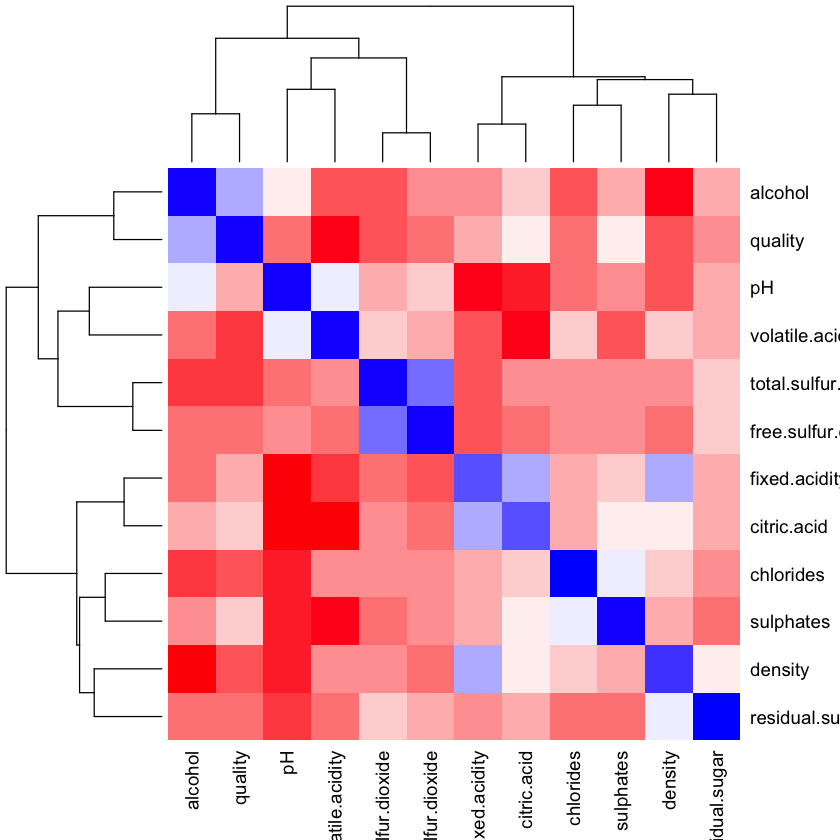

In [46]:
palette = colorRampPalette(c("red", "white", "blue")) (20)
d.cor <- cor(d)
heatmap(round(d.cor, 2), revC=T, col=palette)

In [28]:
round(d.cor, 2)

fixed.acidity volatile.acidity citric.acid residual.sugar
fixed.acidity         1.00         -0.26             0.67        0.11         
volatile.acidity     -0.26          1.00            -0.55        0.00         
citric.acid           0.67         -0.55             1.00        0.14         
residual.sugar        0.11          0.00             0.14        1.00         
chlorides             0.09          0.06             0.20        0.06         
free.sulfur.dioxide  -0.15         -0.01            -0.06        0.19         
total.sulfur.dioxide -0.11          0.08             0.04        0.20         
density               0.67          0.02             0.36        0.36         
pH                   -0.68          0.23            -0.54       -0.09         
sulphates             0.18         -0.26             0.31        0.01         
alcohol              -0.06         -0.20             0.11        0.04         
quality               0.12         -0.39             0.23        0.01         
                     chlorides free.sulfur.dioxide total.sulfur.dioxide density
fixed.acidity         0.09     -0.15               -0.11                 0.67  
volatile.acidity      0.06     -0.01                0.08                 0.02  
citric.acid           0.20     -0.06                0.04                 0.36  
residual.sugar        0.06      0.19                0.20                 0.36  
chlorides             1.00      0.01                0.05                 0.20  
free.sulfur.dioxide   0.01      1.00                0.67                -0.02  
total.sulfur.dioxide  0.05      0.67                1.00                 0.07  
density               0.20     -0.02                0.07                 1.00  
pH                   -0.27      0.07               -0.07                -0.34  
sulphates             0.37      0.05                0.04                 0.15  
alcohol              -0.22     -0.07               -0.21                -0.50  
quality              -0.13     -0.05               -0.19                -0.17  
                     pH    sulphates alcohol quality
fixed.acidity        -0.68  0.18     -0.06    0.12  
volatile.acidity      0.23 -0.26     -0.20   -0.39  
citric.acid          -0.54  0.31      0.11    0.23  
residual.sugar       -0.09  0.01      0.04    0.01  
chlorides            -0.27  0.37     -0.22   -0.13  
free.sulfur.dioxide   0.07  0.05     -0.07   -0.05  
total.sulfur.dioxide -0.07  0.04     -0.21   -0.19  
density              -0.34  0.15     -0.50   -0.17  
pH                    1.00 -0.20      0.21   -0.06  
sulphates            -0.20  1.00      0.09    0.25  
alcohol               0.21  0.09      1.00    0.48  
quality              -0.06  0.25      0.48    1.00

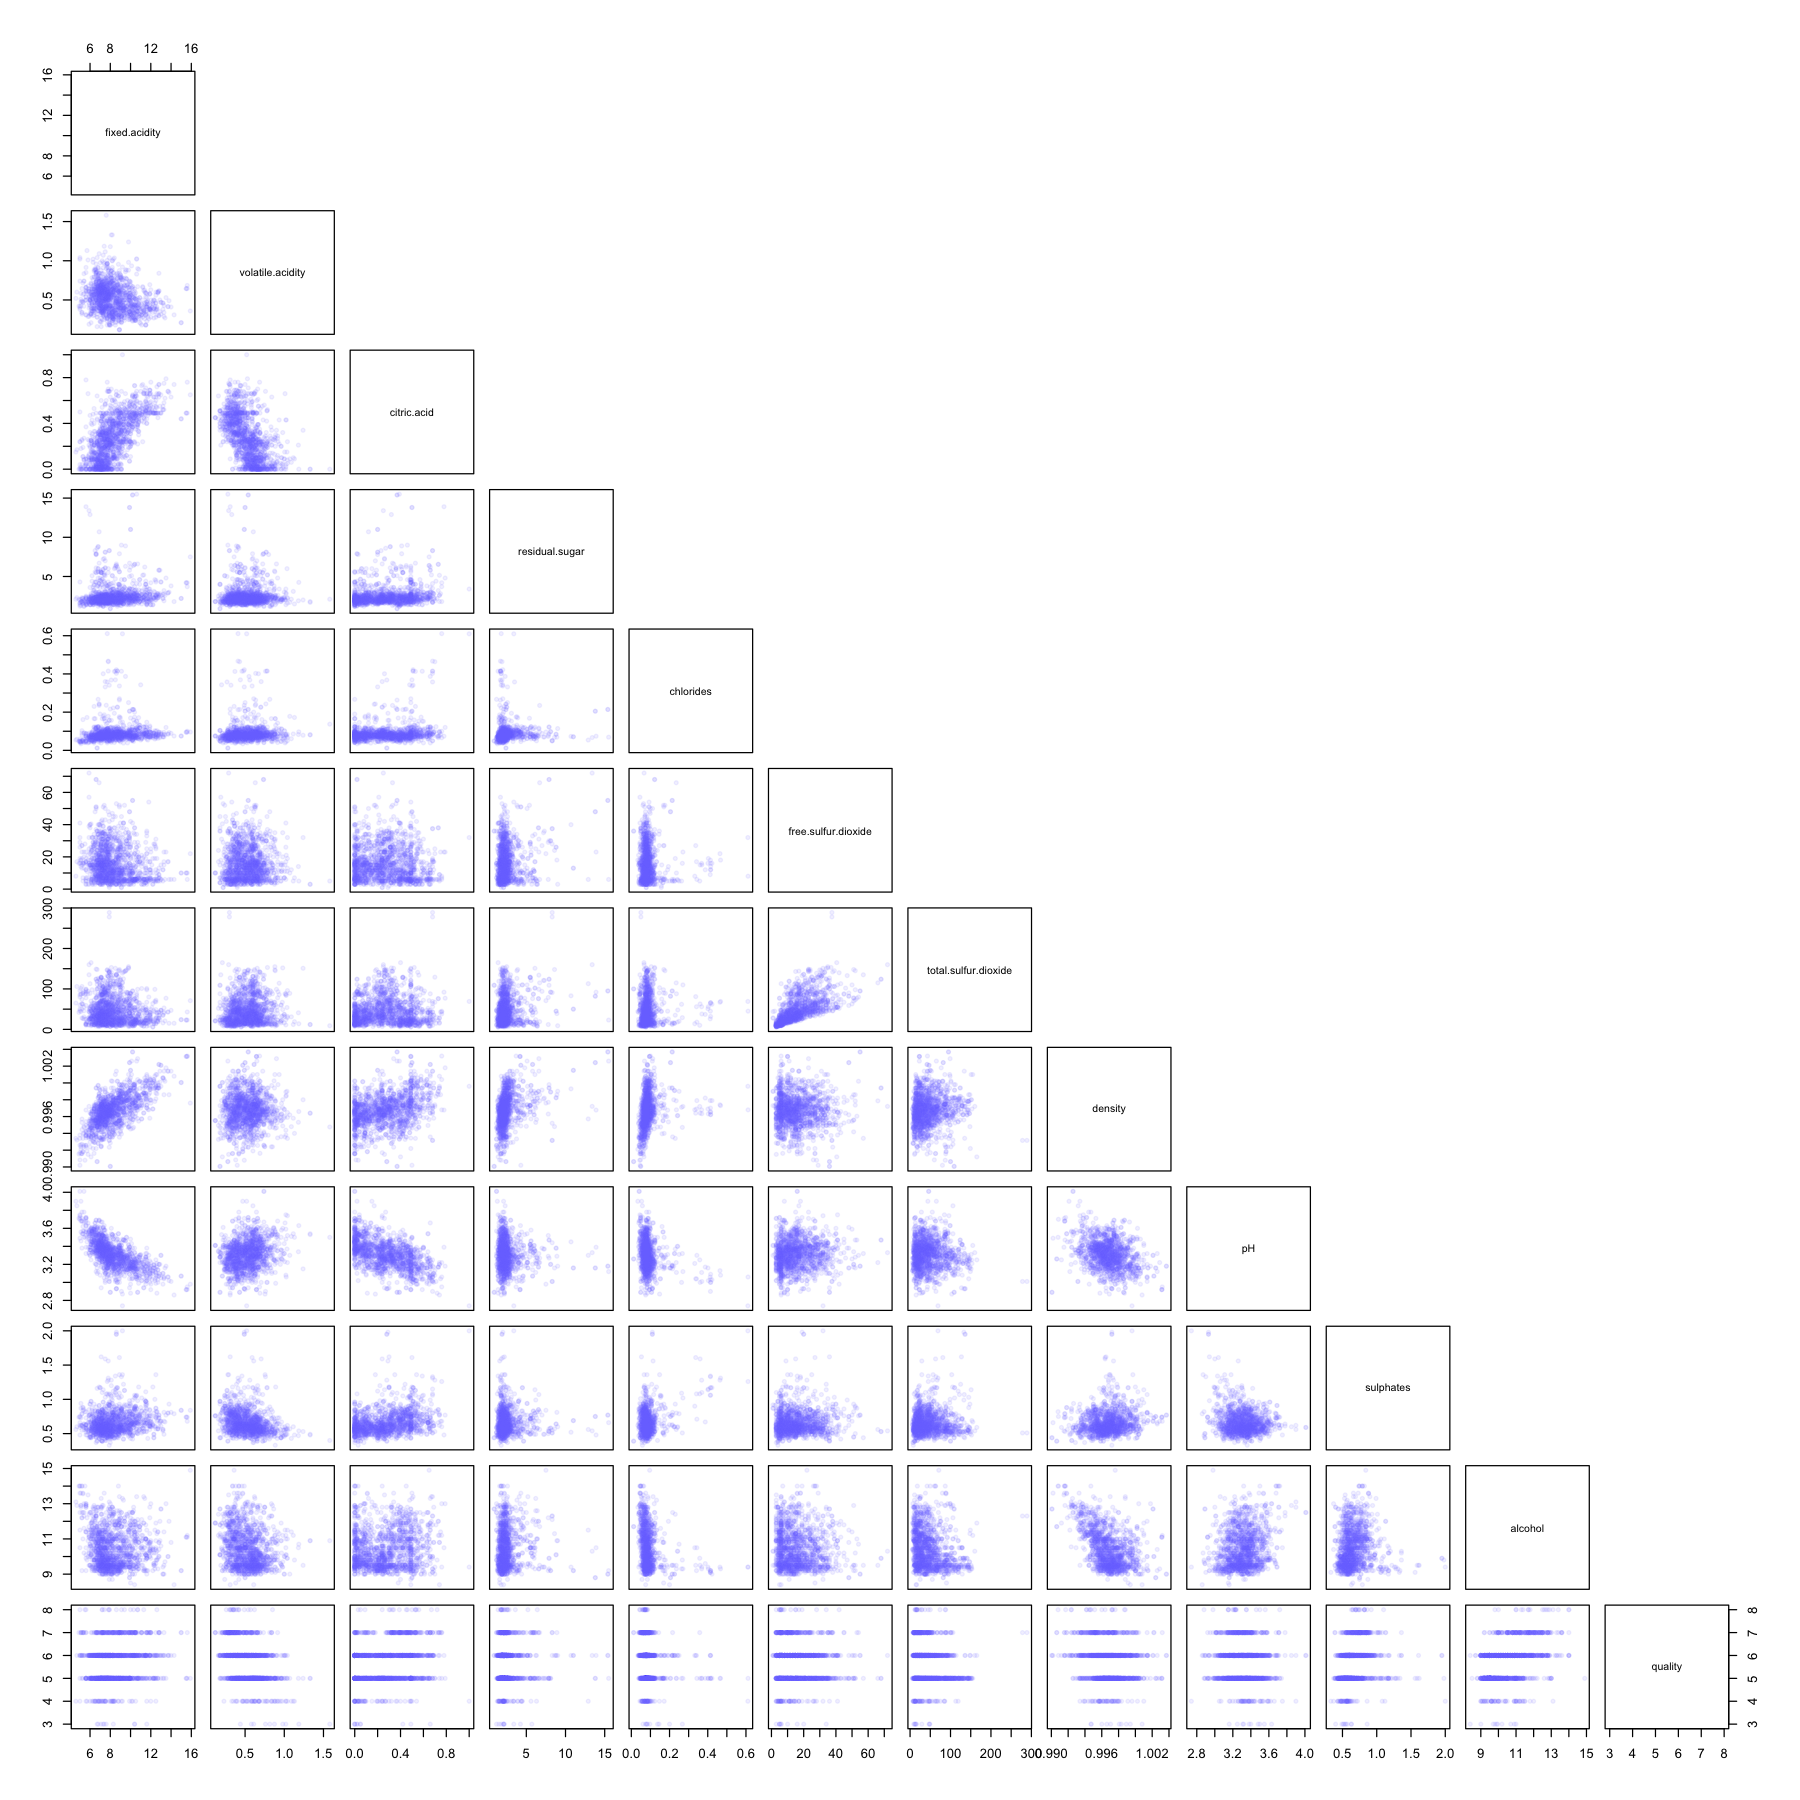

In [54]:
options(repr.plot.width=15, repr.plot.height=15)
pairs(d, col=col.alpha(rangi2,0.1), pch=20, upper.panel=NULL)

In [44]:
counts = count(d$quality)
barplot(counts$freq, names.arg=counts$x)

### Observations
* The data set consists of numerical input variables and an ordinal outcome variable.
* Some of the variables are highly correlated

## Questions to Ask

Before starting any kind of analysis, let's think about which questions we can ask towards this dataset.  
   
**Prediction:**
* Given a new wine that has a known chemical composition, what is the chance of it being a great wine?
* Given a new wine that has a known chemical composition, what is its posterior distribution of quality scores?
* Given a new wine that has a known chemical composition, what is its risk of being a poor wine?


**Inference:**
* Which chemical composition makes a good wine?
* Which chemical composition makes a poor wine?
* What is the relationship between wine quality and alcohol concentration? Is there a mediating influence of other chemicals on the relationship between wine quality and alcohol?

## Model choice

As the outcome variable `quality` is an ordinal variable, we need to model it using an **ordered categorical model**. 

In [62]:
pr_k <- table(d$quality)/nrow(d)

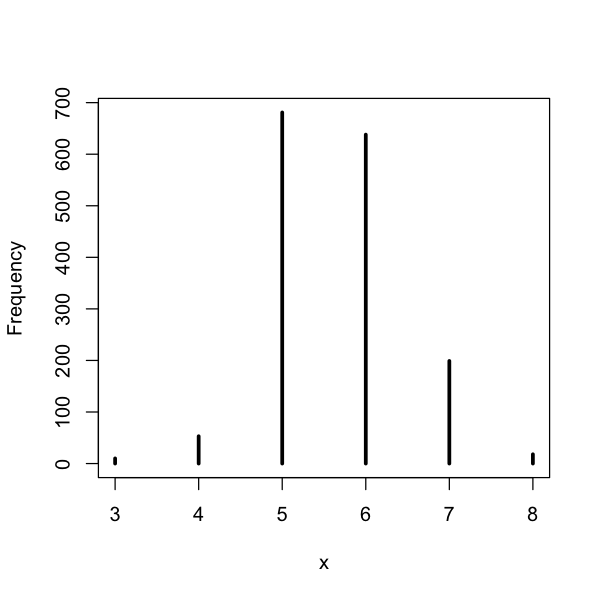

In [60]:
options(repr.plot.width=5, repr.plot.height=5)
simplehist(d$quality)

In [63]:
cum_pr_k <- cumsum(pr_k)

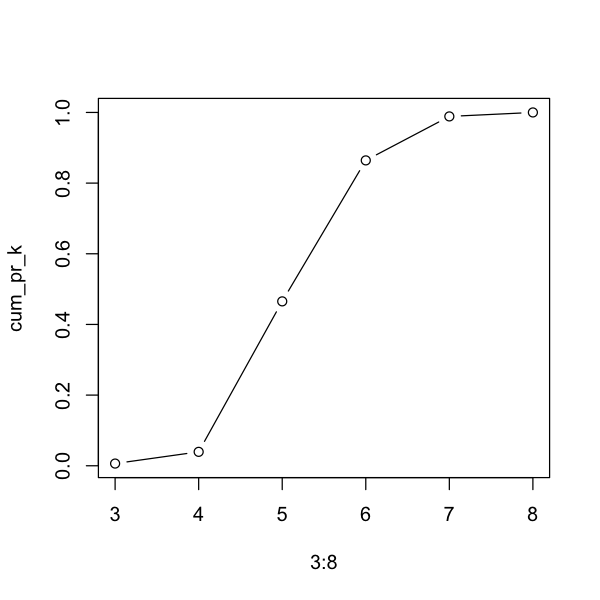

In [64]:
plot(3:8, cum_pr_k, type="b")

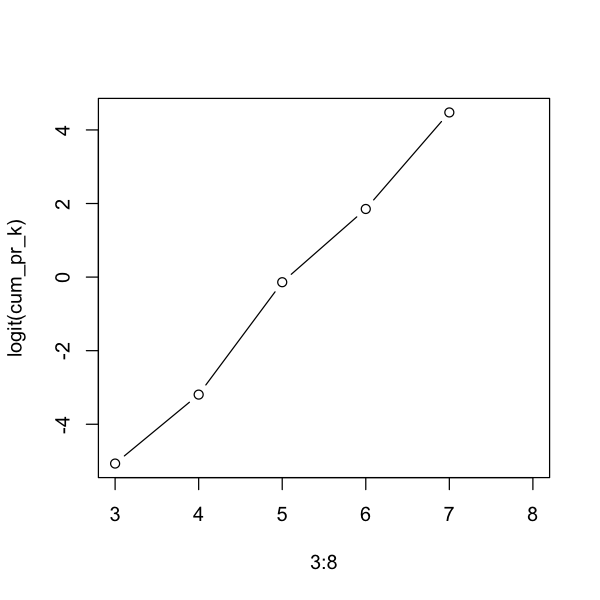

In [69]:
plot(3:8, logit(cum_pr_k), type="b")

In [81]:
table(d$quality-2)


  1   2   3   4   5   6 
 10  53 681 638 199  18 

In [82]:
m1.1 <- ulam(
    alist(
        quality ~ dordlogit(0, cutpoints),
        cutpoints ~ dnorm(0, 1.5)
    ), data=list(quality=d$quality-2), chains=4, cores=4
)

In [83]:
show(m1.1)

Hamiltonian Monte Carlo approximation
2000 samples from 4 chains

Sampling durations (minutes):
        warmup sample total
chain:1   1.11   0.97  2.09
chain:2   0.91   1.04  1.94
chain:3   1.01   0.90  1.91
chain:4   0.97   0.93  1.90

Formula:
quality ~ dordlogit(0, cutpoints)
cutpoints ~ dnorm(0, 1.5)


In [84]:
round(inv_logit(coef(m1.1)), 2)

cutpoints[1] cutpoints[2] cutpoints[3] cutpoints[4] cutpoints[5] 
        0.01         0.04         0.47         0.86         0.99

In [85]:
post <- extract.samples(m1.1)

In [97]:
str(post)

List of 1
 $ cutpoints: num [1:2000, 1:5] -4.83 -5.41 -4.65 -4.83 -5.18 ...
 - attr(*, "source")= chr "ulam posterior: 2000 samples from object"


In [101]:
post_inv <- inv_logit(post$cutpoints)

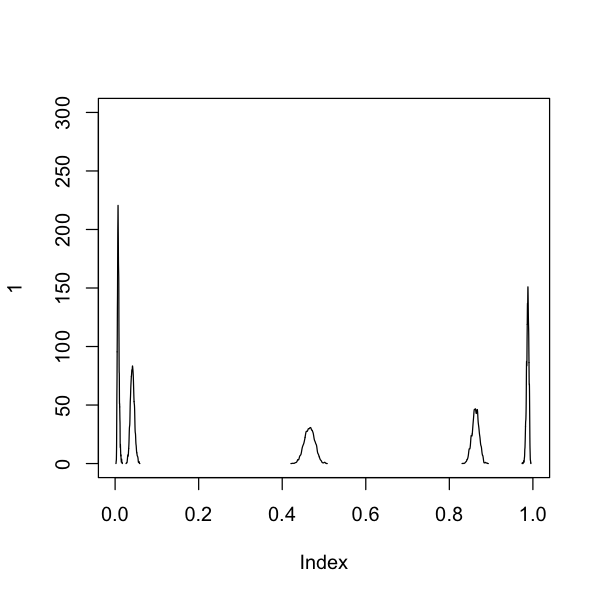

In [118]:
plot(1, type='n', xlim=c(0, 1), ylim=c(0, 300))
for (i in 1:5) dens(post_inv[, i], add=TRUE)

In [120]:
precis(m1.1, depth=2)

mean       sd         5.5%       94.5%       n_eff     Rhat4    
cutpoints[1] -4.9091741 0.27761423 -5.3771773 -4.47292047  963.7859 0.9998973
cutpoints[2] -3.1469629 0.12300542 -3.3455000 -2.95385018 1516.4599 1.0019055
cutpoints[3] -0.1388961 0.05011832 -0.2188531 -0.06025831 1531.0034 0.9989600
cutpoints[4]  1.8393894 0.07200337  1.7214143  1.95753630 1753.5456 0.9997083
cutpoints[5]  4.4001462 0.23355077  4.0333740  4.79750847 1599.6483 1.0017665

## adding predictors to the linear model

In [123]:
dat <- list(
    alcohol=d$alcohol,
    volatile_acid=d$volatile.acid,
    quality=d$quality
)
m1.2 <- ulam(
    alist(
        quality ~ dordlogit(X, cutpoints),
        X <- bA * alcohol + bV * volatile_acid,
        c(bA, bV) ~ dnorm(0, 1.5),
        cutpoints ~ dnorm(0, 1.5)
    ), data=dat, chains=4, cores=4
)

Warning message:
“There were 3 divergent transitions after warmup. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”


In [130]:
show(m1.2)

Hamiltonian Monte Carlo approximation
2000 samples from 4 chains

Sampling durations (minutes):
        warmup sample total
chain:1   5.84   4.74 10.58
chain:2   5.75   5.18 10.93
chain:3   5.22   3.20  8.43
chain:4   5.80   4.77 10.57

Formula:
quality ~ dordlogit(X, cutpoints)
X <- bA * alcohol + bV * volatile_acid
c(bA, bV) ~ dnorm(0, 1.5)
cutpoints ~ dnorm(0, 1.5)


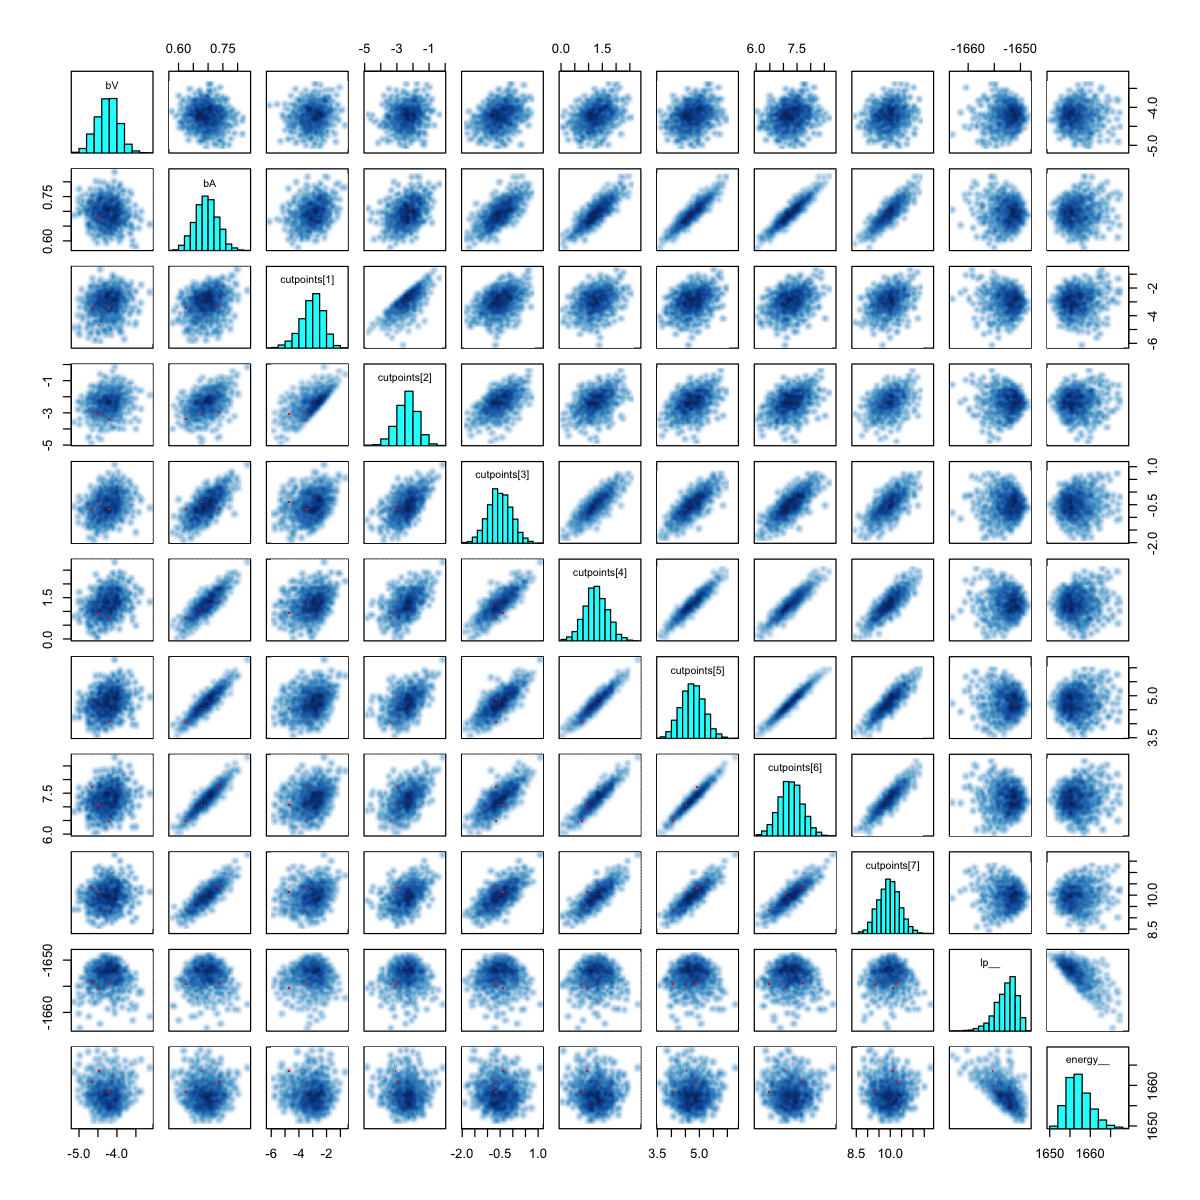

In [140]:
options(repr.plot.width=10, repr.plot.height=10)
pairs(m1.2@stanfit)

[1] 1000
[1] 1
[1] 1000


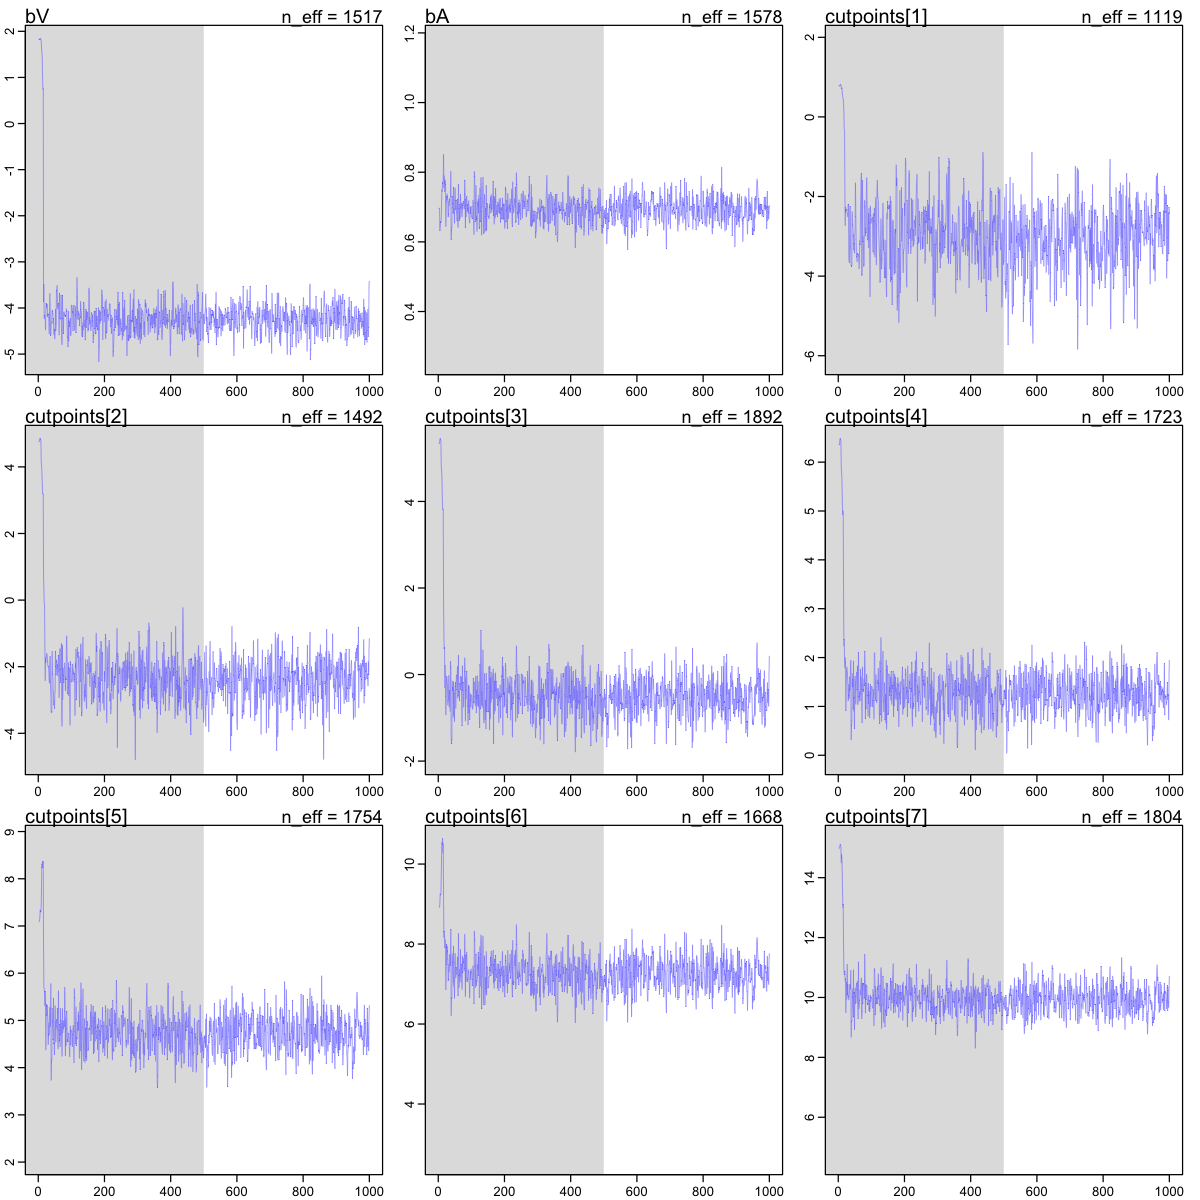

In [148]:
traceplot(m1.2, chain=1)

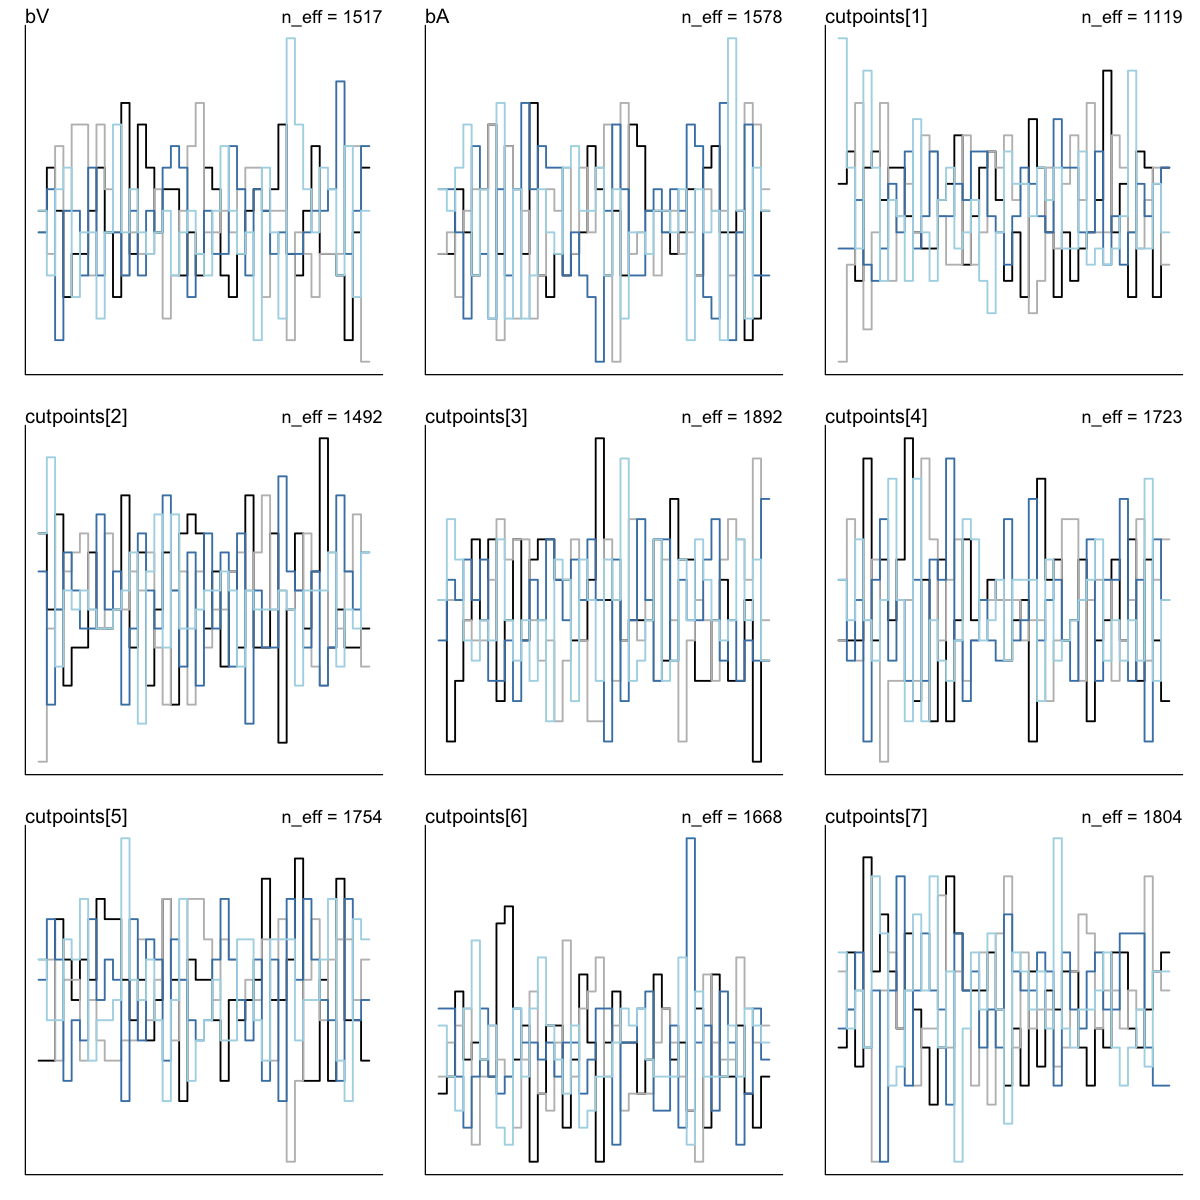

In [154]:
trankplot(m1.2, col=c('black', 'grey', 'steelblue', 'lightblue'))

In [124]:
precis(m1.2)

7 vector or matrix parameters hidden. Use depth=2 to show them.



mean       sd         5.5%       94.5%      n_eff    Rhat4    
bV -4.2409826 0.28496003 -4.7028526 -3.8024982 1517.104 1.0002833
bA  0.6939952 0.03787473  0.6336777  0.7539536 1578.049 0.9991319

7 vector or matrix parameters hidden. Use depth=2 to show them.



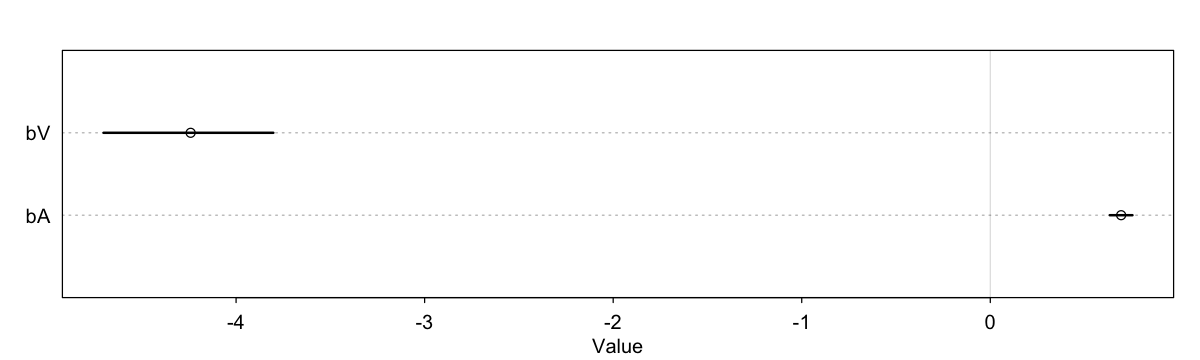

In [129]:
options(repr.plot.width=10, repr.plot.height=3)
plot(precis(m1.2))

### trying to get rid of divergent transitions by increasing adapt_delta

In [150]:
dat <- list(
    alcohol=d$alcohol,
    volatile_acid=d$volatile.acid,
    quality=d$quality
)
m1.3 <- ulam(
    alist(
        quality ~ dordlogit(X, cutpoints),
        X <- bA * alcohol + bV * volatile_acid,
        c(bA, bV) ~ dnorm(0, 1.5),
        cutpoints ~ dnorm(0, 1.5)
    ), data=dat, chains=4, cores=4, control=list(adapt_delta=0.99)
)

In [152]:
show(m1.3)

Hamiltonian Monte Carlo approximation
2000 samples from 4 chains

Sampling durations (minutes):
        warmup sample total
chain:1   8.43  10.01 18.44
chain:2   9.59   9.63 19.22
chain:3  11.35   7.99 19.34
chain:4   9.55  10.04 19.59

Formula:
quality ~ dordlogit(X, cutpoints)
X <- bA * alcohol + bV * volatile_acid
c(bA, bV) ~ dnorm(0, 1.5)
cutpoints ~ dnorm(0, 1.5)


In [151]:
precis(m1.3)

7 vector or matrix parameters hidden. Use depth=2 to show them.



mean       sd         5.5%       94.5%      n_eff    Rhat4   
bV -4.2455661 0.29023961 -4.7164234 -3.7837907 1621.351 0.998725
bA  0.6944261 0.03806697  0.6339994  0.7550176 1410.630 1.000415

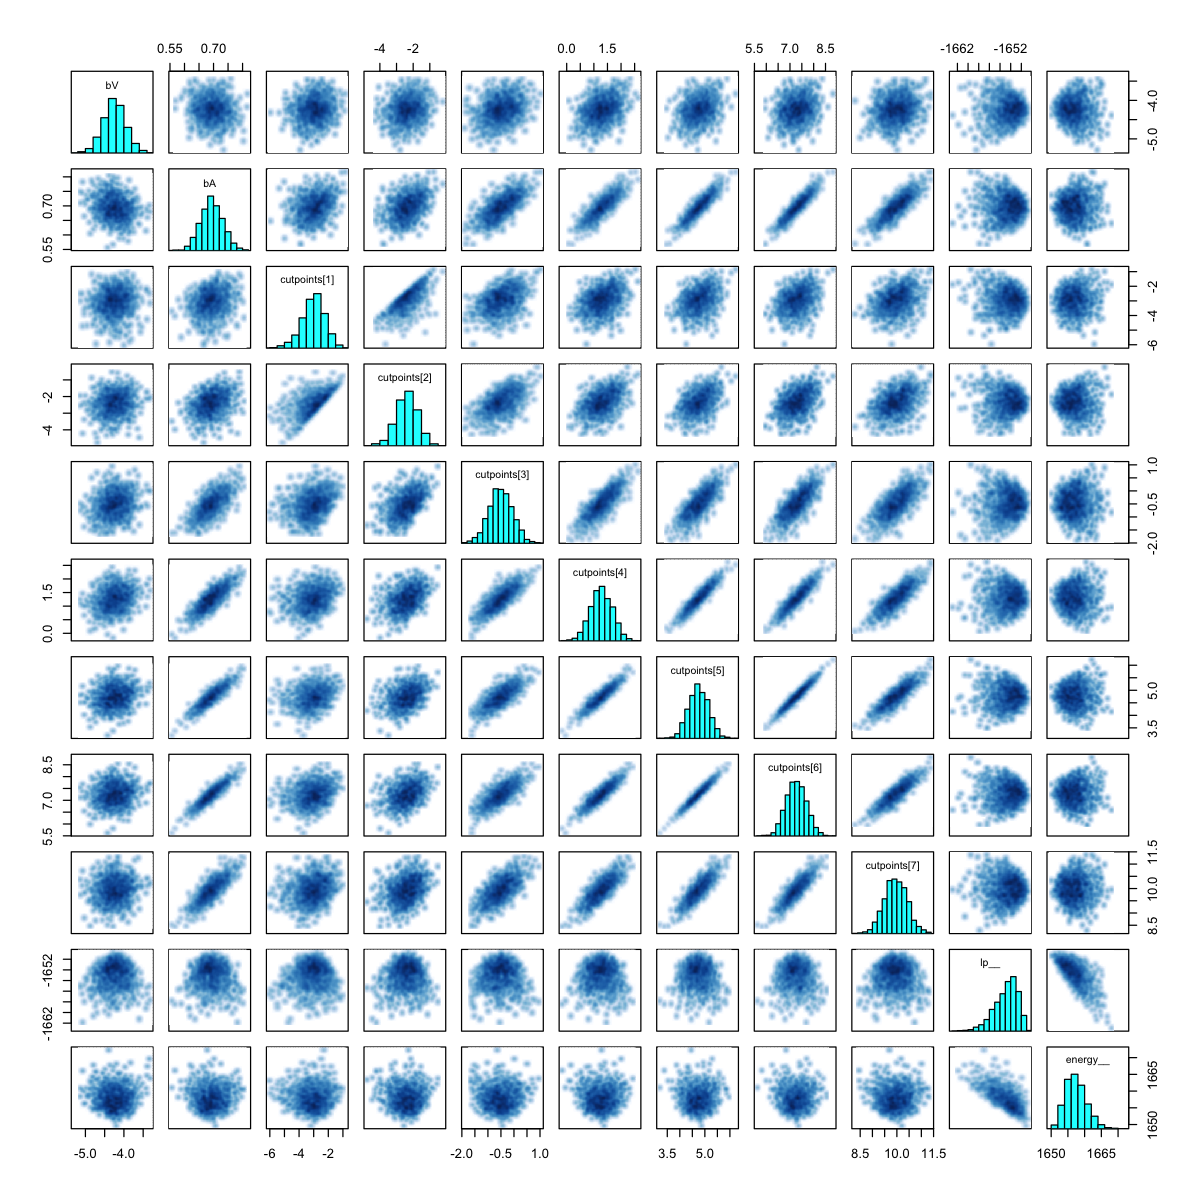

In [153]:
pairs(m1.3@stanfit)